### Dimensionality Reduction on the scaled dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
import seaborn as sns

# Load your preprocessed data
df = pd.read_csv('Data/df_scaled.csv')

In [4]:
df = df.drop(columns='Unnamed: 0')

### PCA - Dimensionality reduction technique 1

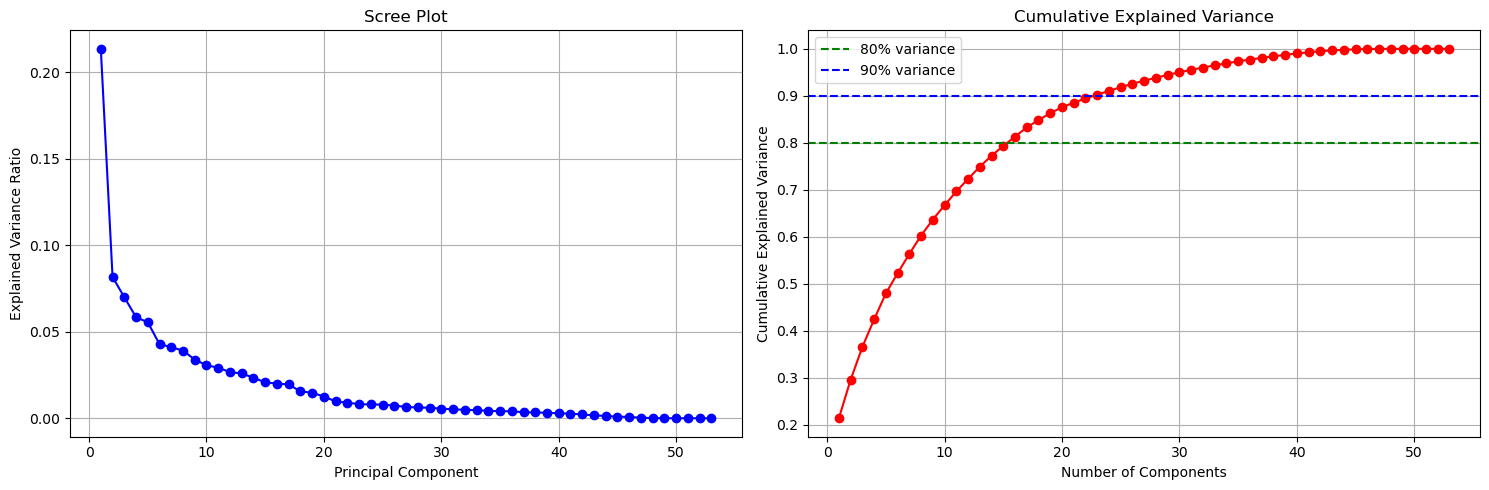

Components for 80% variance: 16
Components for 80% variance: 19
Components for 90% variance: 23


In [5]:
# Fit PCA with all components first
pca_full = PCA()
pca_full.fit(df)

# Calculate cumulative explained variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot to find elbow
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot')
axes[0].grid(True)

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
axes[1].axhline(y=0.80, color='g', linestyle='--', label='80% variance')
axes[1].axhline(y=0.90, color='b', linestyle='--', label='90% variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Find number of components for 80% and 90% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Components for 80% variance: {n_components_80}")
print(f"Components for 80% variance: {n_components_85}")
print(f"Components for 90% variance: {n_components_90}")

###### PCA With Robust Scaling - 80% variance selection

In [7]:
# Apply PCA with components for 80% variance
n_components = n_components_80
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df)

# Convert to DataFrame for easier handling
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

print(f"\n{'='*60}")
print(f"PCA RESULTS")
print(f"{'='*60}")
print(f"Original shape: {df.shape}")
print(f"Reduced shape: {df_pca.shape}")
print(f"Dimensionality reduction: {df.shape[1]} → {n_components} features")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")
print(f"Features reduced by: {((df.shape[1] - n_components) / df.shape[1] * 100):.1f}%")


PCA RESULTS
Original shape: (9874, 53)
Reduced shape: (9874, 19)
Dimensionality reduction: 53 → 19 features
Total variance explained: 86.30%
Features reduced by: 64.2%


##### What do these components represent

In [8]:
# Get feature contributions to each PC
components_df = pd.DataFrame(
    pca.components_,
    columns=df.columns,
    index=pca_columns
)

print(f"\n{'='*60}")
print(f"TOP CONTRIBUTING FEATURES PER COMPONENT")
print(f"{'='*60}")

# Analyze first 5 components
for i in range(min(5, n_components)):
    print(f"\n--- {pca_columns[i]} (Explains {pca.explained_variance_ratio_[i]:.2%} variance) ---")
    
    # Get top 10 absolute contributions
    pc_contributions = components_df.iloc[i].abs().sort_values(ascending=False)
    
    print("\nTop 10 Contributing Features:")
    for j, (feature, loading) in enumerate(pc_contributions.head(10).items(), 1):
        # Get actual loading (with sign)
        actual_loading = components_df.iloc[i][feature]
        print(f"  {j}. {feature}: {actual_loading:.3f} (|{loading:.3f}|)")


TOP CONTRIBUTING FEATURES PER COMPONENT

--- PC1 (Explains 21.37% variance) ---

Top 10 Contributing Features:
  1. BODY_MEASURE_COMPOSITE: -0.312 (|0.312|)
  2. Has_Kidney_Failure: 0.262 (|0.262|)
  3. Had_heart_attack: 0.261 (|0.261|)
  4. Had_Liver_COndition: 0.260 (|0.260|)
  5. Had_Thyroid: 0.252 (|0.252|)
  6. Tested_for_HIV_Virus: 0.248 (|0.248|)
  7. Had_Cancer: 0.247 (|0.247|)
  8. Has_Disability: 0.242 (|0.242|)
  9. Age_Group: -0.232 (|0.232|)
  10. Had_Arthritis: 0.222 (|0.222|)

--- PC2 (Explains 8.17% variance) ---

Top 10 Contributing Features:
  1. General_health_condition: -0.490 (|0.490|)
  2. General_hearing_condition: -0.359 (|0.359|)
  3. Number_of_Vigorous_Physical_activities_per_week: -0.300 (|0.300|)
  4. blood_macros: -0.272 (|0.272|)
  5. Haemoglobin: -0.212 (|0.212|)
  6. Age_Group: 0.185 (|0.185|)
  7. Family_poverty_level_index: -0.175 (|0.175|)
  8. mean_steroid_ng_dl: -0.175 (|0.175|)
  9. Teeth_and_gum_health: -0.171 (|0.171|)
  10. Education_Level: -0.

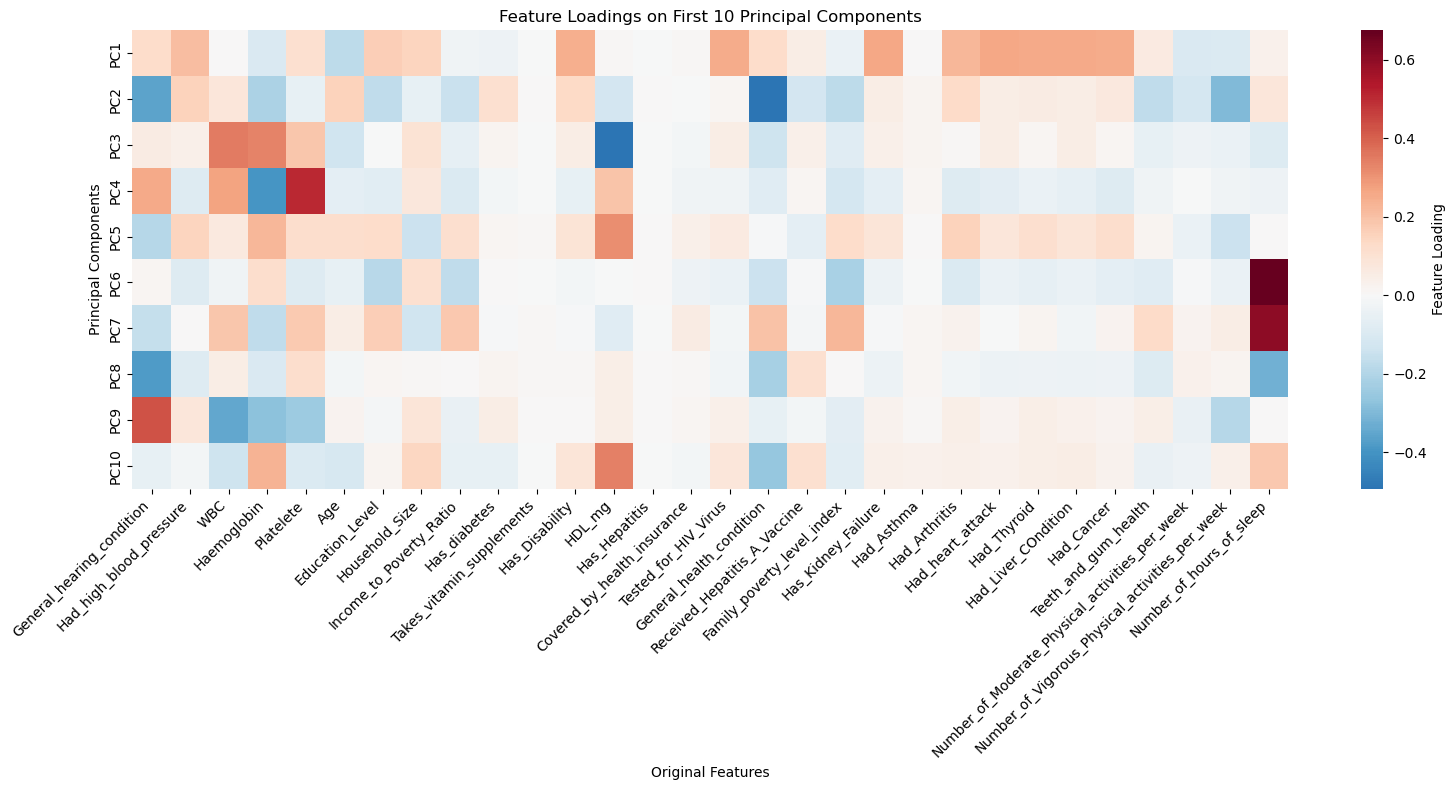

In [9]:
import seaborn as sns

# Heatmap of loadings
n_components_to_show = min(10, n_components)
n_features_to_show = min(30, df.shape[1])

plt.figure(figsize=(16, 8))
sns.heatmap(
    components_df.iloc[:n_components_to_show, :n_features_to_show], 
    cmap='RdBu_r', 
    center=0,
    annot=False,
    cbar_kws={'label': 'Feature Loading'},
    xticklabels=True,
    yticklabels=True
)
plt.title(f'Feature Loadings on First {n_components_to_show} Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-1.051203,-3.218288,0.920278,-0.499473,1.178560,0.540821,-0.036524,-2.520027,0.038035,0.608952,0.513272,1.045755,-2.070650,-0.243804,1.021041,-0.053322,0.126616,-0.047374,1.338692
1,-1.618511,-0.758392,0.069555,-1.671944,1.891577,0.011870,1.269995,0.522697,-0.796383,1.125136,1.082505,0.509701,-0.673918,0.459475,0.178825,0.728329,0.143546,0.364042,0.531035
2,-0.370828,1.321232,0.207748,0.297183,-0.783170,0.928290,-0.894457,0.278605,-0.609949,0.856417,0.611592,0.662915,-1.250977,-1.767327,-0.561926,1.170976,-0.369150,0.159694,-0.223062
3,-1.014440,0.424185,0.776811,0.463668,-0.811939,0.848039,-1.098000,0.186538,-0.088272,0.226130,-0.677811,-0.219827,0.283816,-0.552920,-0.332990,-0.196816,-0.965552,0.921306,0.696010
4,-1.515867,-0.716565,-0.839965,-0.089056,0.411151,-0.487094,0.930947,-0.315410,-0.076235,-0.484566,-0.252755,-0.524605,-0.500041,0.012341,0.120449,0.661223,-0.240002,-0.110925,-0.391382


In [20]:
df_pca.to_csv('Data/pca_dataset.csv', index=False)
print("✓ Saved: pca_dataset.csv")

✓ Saved: pca_dataset.csv


### UMAP - Dimensionality Reduction Technique 2

In [15]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ============================================================
# STEP 1: Load Your Scaled Data
# ============================================================
# Load the same scaled data you used for PCA
df = pd.read_csv('Data/df_scaled.csv')
df = df.drop(columns='Unnamed: 0')


TESTING DIFFERENT UMAP DIMENSIONS

Testing 5 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.406
  Davies-Bouldin: 0.865

Testing 10 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.410
  Davies-Bouldin: 0.857

Testing 15 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.409
  Davies-Bouldin: 0.853

Testing 20 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.409
  Davies-Bouldin: 0.855

Testing 25 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.407
  Davies-Bouldin: 0.859

Testing 30 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.409
  Davies-Bouldin: 0.857


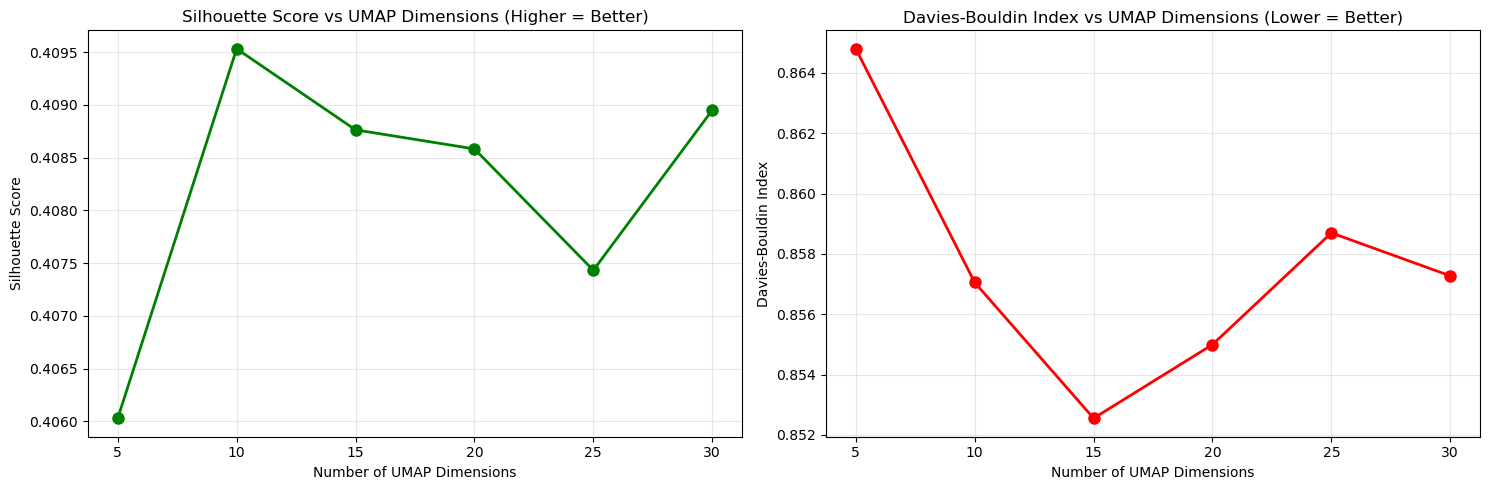


OPTIMAL DIMENSIONS
Best by Silhouette: 10 dimensions
Best by Davies-Bouldin: 15 dimensions


In [16]:
# ============================================================
# STEP 2: Determine Optimal UMAP Dimensions
# ============================================================
print("\n" + "="*60)
print("TESTING DIFFERENT UMAP DIMENSIONS")
print("="*60)

# Test different dimensions to see variance preservation
# We'll use clustering quality as a proxy since UMAP doesn't have explained variance
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

dimension_range = [5, 10, 15, 20, 25, 30]
metrics = {
    'dimensions': [],
    'silhouette': [],
    'davies_bouldin': []
}

for n_dim in dimension_range:
    print(f"\nTesting {n_dim} dimensions...")
    
    # Apply UMAP
    umap_test = umap.UMAP(
        n_components=n_dim,
        n_neighbors=15,
        min_dist=0.0,
        metric='euclidean',
        random_state=42
    )
    
    data_reduced = umap_test.fit_transform(df)
    
    # Test with clustering (k=5)
    kmeans_test = KMeans(n_clusters=5, random_state=42, n_init=10)
    labels = kmeans_test.fit_predict(data_reduced)
    
    # Calculate metrics
    sil = silhouette_score(data_reduced, labels)
    db = davies_bouldin_score(data_reduced, labels)
    
    metrics['dimensions'].append(n_dim)
    metrics['silhouette'].append(sil)
    metrics['davies_bouldin'].append(db)
    
    print(f"  Silhouette: {sil:.3f}")
    print(f"  Davies-Bouldin: {db:.3f}")

# Plot metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(metrics['dimensions'], metrics['silhouette'], 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of UMAP Dimensions')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs UMAP Dimensions (Higher = Better)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(metrics['dimensions'], metrics['davies_bouldin'], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of UMAP Dimensions')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Davies-Bouldin Index vs UMAP Dimensions (Lower = Better)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal dimensions
best_sil_idx = np.argmax(metrics['silhouette'])
best_db_idx = np.argmin(metrics['davies_bouldin'])

print(f"\n{'='*60}")
print(f"OPTIMAL DIMENSIONS")
print(f"{'='*60}")
print(f"Best by Silhouette: {metrics['dimensions'][best_sil_idx]} dimensions")
print(f"Best by Davies-Bouldin: {metrics['dimensions'][best_db_idx]} dimensions")

In [17]:
# ============================================================
# STEP 3: Apply UMAP with Chosen Dimensions
# ============================================================

# Choose dimensions
n_components_umap = 15 

print(f"\n{'='*60}")
print(f"APPLYING UMAP WITH {n_components_umap} COMPONENTS")
print(f"{'='*60}")

umap_reducer = umap.UMAP(
    n_components=n_components_umap,
    n_neighbors=15,          # Controls local vs global structure (5-50)
    min_dist=0.0,            # 0.0 for clustering, 0.1-0.5 for visualization
    metric='euclidean',
    random_state=42,
    verbose=True
)

df_umap = umap_reducer.fit_transform(df)

# Convert to DataFrame
umap_columns = [f'UMAP{i+1}' for i in range(n_components_umap)]
df_umap = pd.DataFrame(df_umap, columns=umap_columns)

print(f"\n{'='*60}")
print(f"UMAP RESULTS")
print(f"{'='*60}")
print(f"Original shape: {df.shape}")
print(f"Reduced shape: {df_umap.shape}")
print(f"Dimensionality reduction: {df.shape[1]} → {n_components_umap} features")
print(f"Features reduced by: {((df.shape[1] - n_components_umap) / df.shape[1] * 100):.1f}%")


APPLYING UMAP WITH 15 COMPONENTS
UMAP(min_dist=0.0, n_components=15, n_jobs=1, random_state=42, verbose=True)
Wed Oct  8 14:59:15 2025 Construct fuzzy simplicial set
Wed Oct  8 14:59:15 2025 Finding Nearest Neighbors
Wed Oct  8 14:59:15 2025 Building RP forest with 10 trees
Wed Oct  8 14:59:16 2025 NN descent for 13 iterations
	 1  /  13


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	Stopping threshold met -- exiting after 5 iterations
Wed Oct  8 14:59:17 2025 Finished Nearest Neighbor Search
Wed Oct  8 14:59:17 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Oct  8 14:59:57 2025 Finished embedding

UMAP RESULTS
Original shape: (9874, 53)
Reduced shape: (9874, 15)
Dimensionality reduction: 53 → 15 features
Features reduced by: 71.7%


In [18]:
# ============================================================
# STEP 4: Analyze UMAP Components
# ============================================================

# UMAP doesn't have loadings like PCA, but we can check correlations
print(f"\n{'='*60}")
print(f"UMAP COMPONENT CORRELATIONS WITH ORIGINAL FEATURES")
print(f"{'='*60}")

# Calculate correlations between UMAP components and original features
correlations = []
for i in range(min(5, n_components_umap)):
    print(f"\n--- UMAP{i+1} ---")
    corr_with_features = df.corrwith(df_umap[f'UMAP{i+1}']).abs().sort_values(ascending=False)
    
    print("Top 10 Correlated Original Features:")
    for j, (feature, corr) in enumerate(corr_with_features.head(10).items(), 1):
        print(f"  {j}. {feature}: {corr:.3f}")


UMAP COMPONENT CORRELATIONS WITH ORIGINAL FEATURES

--- UMAP1 ---
Top 10 Correlated Original Features:
  1. Marital_Status_Unknown: 0.995
  2. Has_Kidney_Failure: 0.954
  3. Had_heart_attack: 0.953
  4. Had_Liver_COndition: 0.942
  5. Had_Thyroid: 0.881
  6. Had_Cancer: 0.873
  7. Has_Disability: 0.844
  8. Tested_for_HIV_Virus: 0.842
  9. Had_Arthritis: 0.774
  10. Had_high_blood_pressure: 0.755

--- UMAP2 ---
Top 10 Correlated Original Features:
  1. Age: 0.787
  2. Age_Group: 0.777
  3. Marital_Status_Unknown: 0.550
  4. SystolicBP: 0.543
  5. Tested_for_HIV_Virus: 0.511
  6. General_hearing_condition: 0.503
  7. Has_Kidney_Failure: 0.496
  8. Had_Liver_COndition: 0.494
  9. Had_heart_attack: 0.483
  10. Had_Thyroid: 0.459

--- UMAP3 ---
Top 10 Correlated Original Features:
  1. Marital_Status_Unknown: 0.784
  2. Has_Kidney_Failure: 0.730
  3. Had_Liver_COndition: 0.727
  4. Age_Group: 0.722
  5. Had_heart_attack: 0.722
  6. Age: 0.710
  7. Tested_for_HIV_Virus: 0.681
  8. Had_Thyr

C:\Users\vickv\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\vickv\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [21]:
# ============================================================
# STEP 6: Save Results
# ============================================================

# Save UMAP-reduced data for clustering
df_umap.to_csv('Data/umap_dataset.csv', index=False)

✓ Saved: c2c_umap_reduced.csv


#### Notes:
- The two famous dimensionality reduction techniques are PCA and UMAP
- SVD is fien but works well for sparse datasets- our dataset is not sparse and is very dense so we ignore it
- Techniques like t-SNE are most likely used to visualize the results of the clusters after a clustering algorithm is run so that we can reduce the dimension of the dataframe for better visualization in 2D/3D